In [1]:
#import Pkg; Pkg.add("...")

using OrdinaryDiffEq
using ModelingToolkit
using DataDrivenDiffEq
using LinearAlgebra, DiffEqSensitivity, Optim
using DiffEqFlux, Flux, ForwardDiff
using Plots
gr()

┌ Warning: `haskey(::TargetIterator, name::String)` is deprecated, use `Target(; name = name) !== nothing` instead.
│   caller = llvm_compat(::VersionNumber) at compatibility.jl:176
└ @ CUDAnative C:\Users\valpe\.julia\packages\CUDAnative\ierw8\src\compatibility.jl:176


Plots.GRBackend()

In [19]:
V(q) = -sin(q)
K(p) = p

K (generic function with 1 method)

In [46]:
function leapfrog(q0, p0, Δt, N)
    q = [q0]
    p = [p0]
    p̄ = []
    for i ∈ 1:N
        p̄ = push!(p̄, p[end] - 0.5*Δt*V(q[end]))
        q = push!(q, q[end] + Δt*K(p̄[end]))
        p = push!(p, p̄[end] - 0.5*Δt*V(q[end]))
    end
    return [q, p]
end

leapfrog (generic function with 1 method)

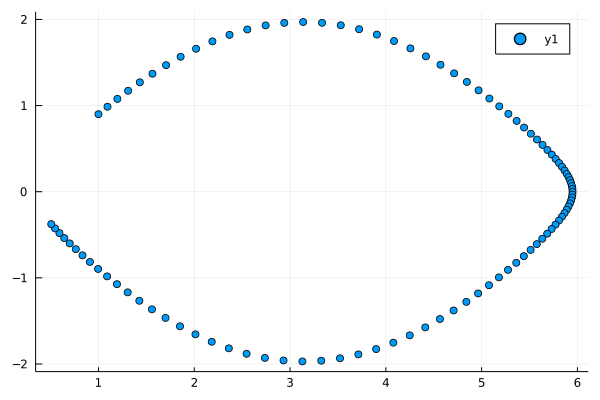

In [47]:
tr = leapfrog(1., 0.9, 0.1, 100)
scatter(tr[1], tr[2])